In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv("__thoughts__/workingdf.csv", index_col=0)

In [4]:
df

,Gender,Age (in years),Country of residence,Living area,Children,Job,Small-scale_NEUTRAL,Large-scale_NEUTRAL,Total conform,Risk6,Small-scale_COVID19,Large-scale_COVID19,Education_cat
Participant ID,,,,,,,,,,,,,
R_OdiJe8PVveer3Zn,1,19,4,2,1,1,1,2,34,5,2,1,1
R_3DqIs9P59r1j91m,1,19,4,2,1,1,2,2,32,7,2,1,1
R_3NCJWc5lFsJxpzf,1,19,4,2,1,1,2,2,34,5,2,2,1
R_3EHn7EsgsNvKv8g,2,19,4,2,1,1,2,2,38,7,2,2,2
R_3CZ6NFiUmFAkssV,2,19,4,2,1,1,2,2,23,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_33srhXrs4WiD2aY,1,27,4,2,1,7,2,2,35,4,2,1,3
R_2VPkB4PQPnP9OYv,2,68,5,2,3,7,2,1,19,6,2,1,2
R_2QFAUZS7vWUIgKm,2,57,5,2,3,3,1,2,27,6,2,1,3


In [5]:
def onezero(x):
    if x == 2:
        return 0
    else:
        return x
        

In [6]:
df = pd.get_dummies(data= df, columns=["Job"])
df = pd.get_dummies(data= df, columns=["Country of residence"])


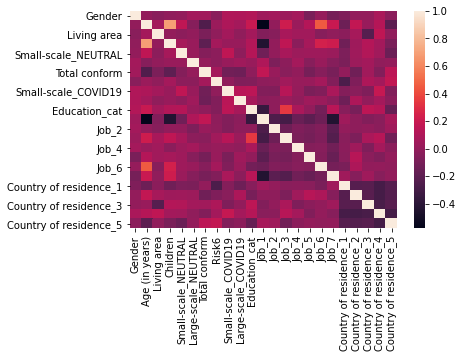

In [7]:
corr = df.corr()
sns.heatmap(corr)

In [8]:
df.columns

Index(['Gender', 'Age (in years)', 'Living area', 'Children',
       'Small-scale_NEUTRAL', 'Large-scale_NEUTRAL', 'Total conform', 'Risk6',
       'Small-scale_COVID19', 'Large-scale_COVID19', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7',
       'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5'],
      dtype='object')

# SUPERVISED CLASSIFICATION MACHINE LEARNING

In [9]:
large_scaleC=df[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5','Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Large-scale_COVID19']]

In [10]:
large_scaleC.shape

(542, 20)

In [11]:
X_LSC = large_scaleC[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_LSC = large_scaleC[['Large-scale_COVID19']]

In [12]:
X_train, X_test, y_train, y_test  = train_test_split(X_LSC,y_LSC,test_size = 0.2)

In [13]:
models = {
    "RandomForest" : RandomForestClassifier(bootstrap= True, max_depth= 100, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 2, n_estimators = 200),
    "SVC": SVC(),
    "OneVsRest":OneVsRestClassifier(SVC()),
    "NNeighborC":KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 10, p = 1, weights= 'distance'),
}

In [14]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train.values.ravel())
    #I changed it to values.ravel() to fix a warning, check if correct.
    #.values will give the values in an array. (shape: (n,1)
    #.ravel will convert that array shape to (n, )
print("Training done")

Training RandomForest
Training SVC
Training OneVsRest
Training NNeighborC
Training done


In [15]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("Accuracy",round(accuracy_score(y_test, y_pred),3))
    print("Precision",round(precision_score(y_test,y_pred,average = 'weighted'),3))
    print("Recall",round(recall_score(y_test, y_pred, average = 'weighted'),3))
    print("F1Score",round(f1_score(y_test, y_pred, average = 'weighted'),3))
    print("ClassificationRepport:\n\n", classification_report(y_test, y_pred))


-------RandomForest-------
Accuracy 0.514
Precision 0.543
Recall 0.514
F1Score 0.512
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.45      0.63      0.52        46
           2       0.61      0.43      0.50        63

    accuracy                           0.51       109
   macro avg       0.53      0.53      0.51       109
weighted avg       0.54      0.51      0.51       109

-------SVC-------
Accuracy 0.422
Precision 0.178
Recall 0.422
F1Score 0.25
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.42      1.00      0.59        46
           2       0.00      0.00      0.00        63

    accuracy                           0.42       109
   macro avg       0.21      0.50      0.30       109
weighted avg       0.18      0.42      0.25       109

-------OneVsRest-------
Accuracy 0.422
Precision 0.178
Recall 0.422
F1Score 0.25
ClassificationRepport:

               precision    rec

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [16]:
for name, model in models.items():
    scores = cross_val_score(model, X_LSC, y_LSC.values.ravel(), cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")

(RandomForest) acccuracy=0.4758922558922558
(SVC) acccuracy=0.488989898989899
(OneVsRest) acccuracy=0.488989898989899
(NNeighborC) acccuracy=0.5073737373737374


In [17]:
# I perform grid search and use best parameters for RandomForest Classifier and KNeighbors Classifier


In [18]:
!pip3 install scikit-multilearn


# UNSUPERVISED LEARNING 

In [19]:
df

,Gender,Age (in years),Living area,Children,Small-scale_NEUTRAL,Large-scale_NEUTRAL,Total conform,Risk6,Small-scale_COVID19,Large-scale_COVID19,...,Job_3,Job_4,Job_5,Job_6,Job_7,Country of residence_1,Country of residence_2,Country of residence_3,Country of residence_4,Country of residence_5
Participant ID,,,,,,,,,,,,,,,,,,,,,
R_OdiJe8PVveer3Zn,1,19,2,1,1,2,34,5,2,1,...,0,0,0,0,0,0,0,0,1,0
R_3DqIs9P59r1j91m,1,19,2,1,2,2,32,7,2,1,...,0,0,0,0,0,0,0,0,1,0
R_3NCJWc5lFsJxpzf,1,19,2,1,2,2,34,5,2,2,...,0,0,0,0,0,0,0,0,1,0
R_3EHn7EsgsNvKv8g,2,19,2,1,2,2,38,7,2,2,...,0,0,0,0,0,0,0,0,1,0
R_3CZ6NFiUmFAkssV,2,19,2,1,2,2,23,1,2,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_33srhXrs4WiD2aY,1,27,2,1,2,2,35,4,2,1,...,0,0,0,0,1,0,0,0,1,0
R_2VPkB4PQPnP9OYv,2,68,2,3,2,1,19,6,2,1,...,0,0,0,0,1,0,0,0,0,1
R_2QFAUZS7vWUIgKm,2,57,2,3,1,2,27,6,2,1,...,1,0,0,0,0,0,0,0,0,1


In [20]:
large_scaleC.shape


(542, 20)

In [21]:
large_scaleC["Large-scale_COVID19"] = large_scaleC["Large-scale_COVID19"].apply(onezero)

<ipython-input-21-aeab5d092e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_scaleC["Large-scale_COVID19"] = large_scaleC["Large-scale_COVID19"].apply(onezero)


In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

labels = model.fit_predict(large_scaleC.drop(columns=["Large-scale_COVID19"]))

large_scaleC["label"] = labels
large_scaleC.head()
large_scaleC["label"].value_counts()
large_scaleC["Large-scale_COVID19"].value_counts()

<ipython-input-22-6bdc9724840d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_scaleC["label"] = labels


1    283
0    259
Name: Large-scale_COVID19, dtype: int64

<ipython-input-23-5122c05ae1dd>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


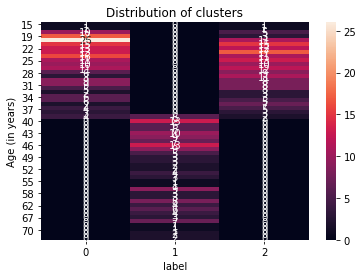

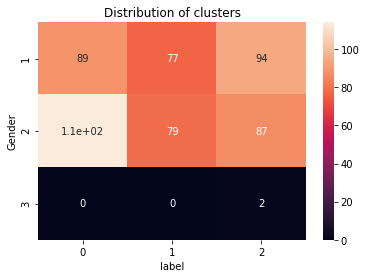

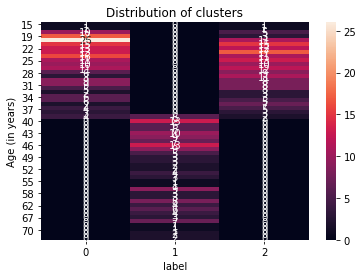

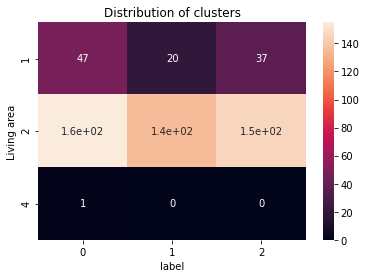

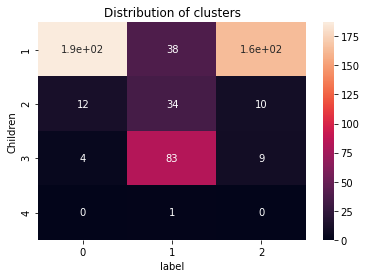

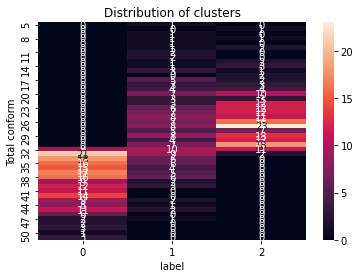

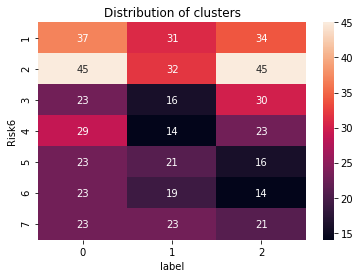

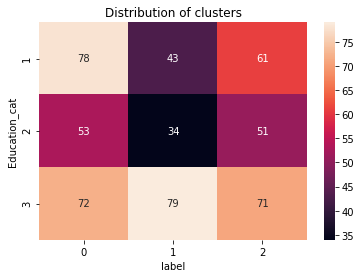

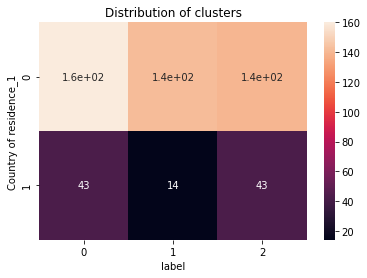

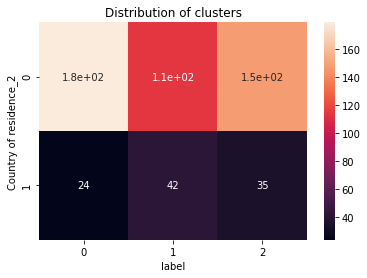

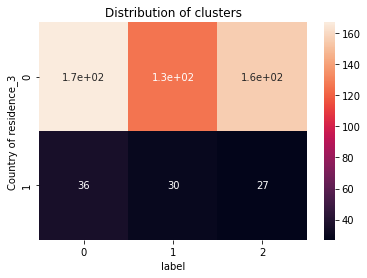

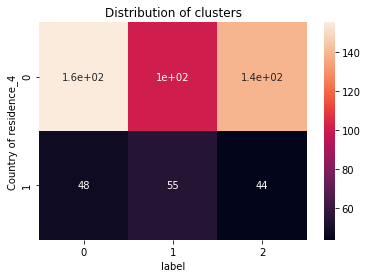

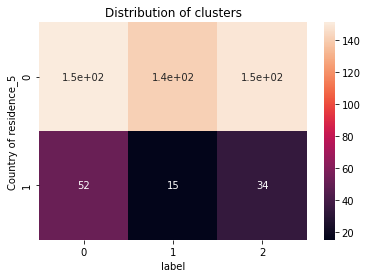

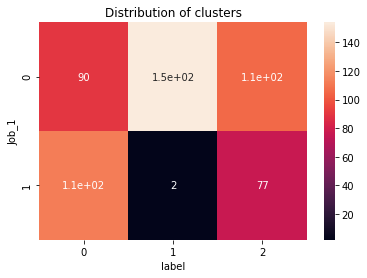

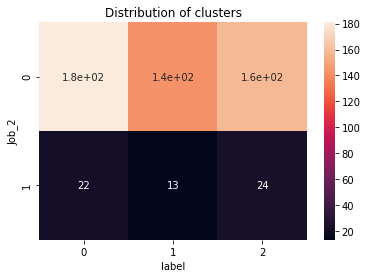

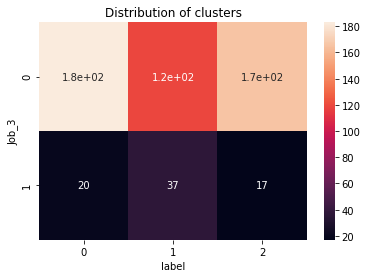

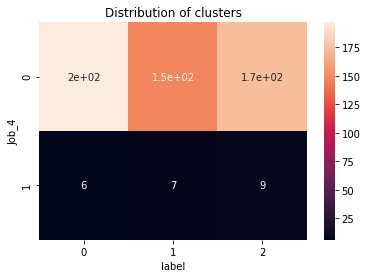

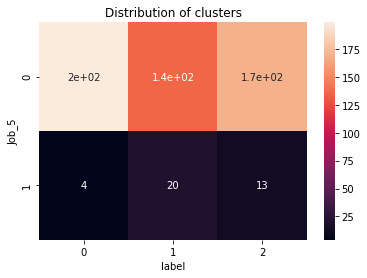

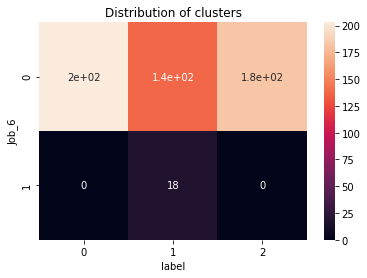

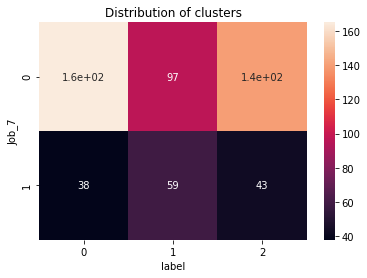

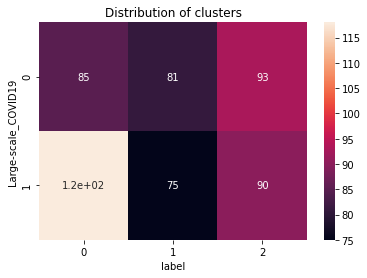

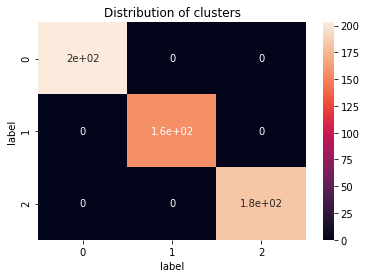

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
ct = pd.crosstab(large_scaleC["Age (in years)"],large_scaleC["label"])
plt.title("Distribution of clusters")
sns.heatmap(ct, annot = True)
for col in large_scaleC.columns:
    plt.figure()
    ct = pd.crosstab(large_scaleC[col],large_scaleC["label"])
    plt.title("Distribution of clusters")
    sns.heatmap(ct, annot = True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


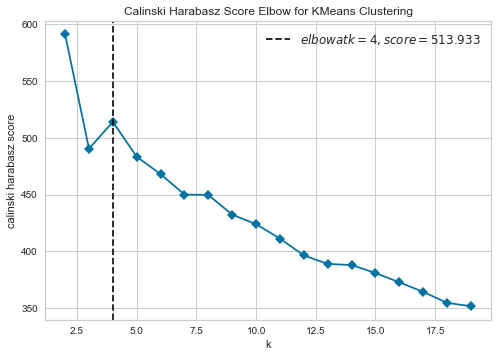

In [24]:
from sklearn.cluster import KMeans
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='calinski_harabasz', timings=False
)

visualizer.fit(large_scaleC)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff05bdc2e80>,
                 k=None, metric='silhouette', model=None, timings=False)

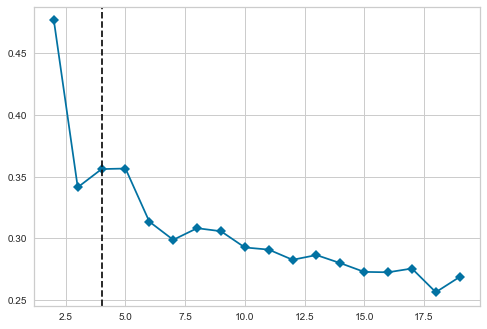

In [25]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric="silhouette", timings=False)

visualizer.fit(large_scaleC)        # Fit the data to the visualizer


In [26]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.5).fit(large_scaleC)
labels_DBSCAN = clustering.labels_
large_scaleC["labels_DBSCAN"]=labels_DBSCAN
large_scaleC

<ipython-input-26-61aa70a0d363>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_scaleC["labels_DBSCAN"]=labels_DBSCAN


,Gender,Age (in years),Living area,Children,Total conform,Risk6,Education_cat,Country of residence_1,Country of residence_2,Country of residence_3,...,Job_1,Job_2,Job_3,Job_4,Job_5,Job_6,Job_7,Large-scale_COVID19,label,labels_DBSCAN
Participant ID,,,,,,,,,,,,,,,,,,,,,
R_OdiJe8PVveer3Zn,1,19,2,1,34,5,1,0,0,0,...,1,0,0,0,0,0,0,1,0,-1
R_3DqIs9P59r1j91m,1,19,2,1,32,7,1,0,0,0,...,1,0,0,0,0,0,0,1,0,-1
R_3NCJWc5lFsJxpzf,1,19,2,1,34,5,1,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
R_3EHn7EsgsNvKv8g,2,19,2,1,38,7,2,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
R_3CZ6NFiUmFAkssV,2,19,2,1,23,1,2,0,0,0,...,1,0,0,0,0,0,0,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_33srhXrs4WiD2aY,1,27,2,1,35,4,3,0,0,0,...,0,0,0,0,0,0,1,1,0,-1
R_2VPkB4PQPnP9OYv,2,68,2,3,19,6,2,0,0,0,...,0,0,0,0,0,0,1,1,1,-1
R_2QFAUZS7vWUIgKm,2,57,2,3,27,6,3,0,0,0,...,0,0,1,0,0,0,0,1,1,-1


In [27]:
large_scaleC["labels_DBSCAN"].value_counts()


-1    542
Name: labels_DBSCAN, dtype: int64

In [28]:
large_scaleC["label"].value_counts()


0    203
2    183
1    156
Name: label, dtype: int64

In [29]:
large_scaleC["Large-scale_COVID19"].value_counts()

1    283
0    259
Name: Large-scale_COVID19, dtype: int64

Text(0, 0.5, 'Total conform')

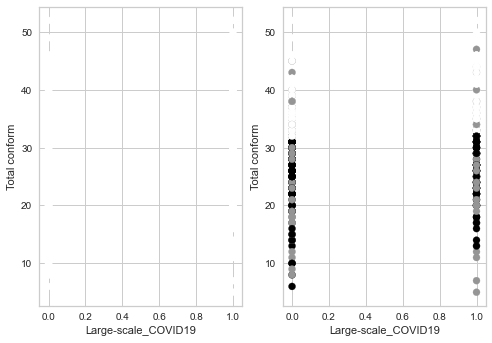

In [30]:
plt.subplots
plt.subplot(1,2,1)
plt.scatter(large_scaleC["Large-scale_COVID19"],large_scaleC["Total conform"],c=large_scaleC["labels_DBSCAN"] )
plt.xlabel("Large-scale_COVID19")
plt.ylabel("Total conform")
plt.subplot(1,2,2)
plt.scatter(large_scaleC["Large-scale_COVID19"],large_scaleC["Total conform"],c=large_scaleC["label"])
plt.xlabel("Large-scale_COVID19")
plt.ylabel("Total conform")